In [0]:
# check python's version
!python -V

Python 3.6.8


In [0]:
#check cuda's version
!ls /usr/lib/x86_64-linux-gnu/libcuda*

/usr/lib/x86_64-linux-gnu/libcuda.so
/usr/lib/x86_64-linux-gnu/libcuda.so.1
/usr/lib/x86_64-linux-gnu/libcuda.so.430.40


In [0]:
#install PyTorch
!pip3 install torch torchvision
!pip install scikit-learn

In [0]:
#import
import torch, torchvision
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [0]:
#for colab
#from google.colab import drive
#import gzip
#import pickle
#mount
#drive.mount('/content/drive/')
#change directory
#%cd "/content/drive/My Drive/data"
#!ls
#define file name
#FILE_NAME = 'mnist.pkl.gz'
#open file
#with gzip.open(FILE_NAME, 'rb') as f:
  #dataset = pickle.load()

In [0]:
#fetch dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X /= 255
y = [float(s) for s in y]

0


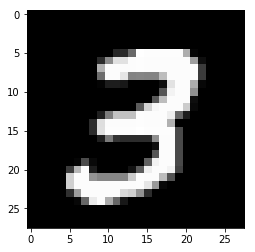

In [0]:
#show the subset of the dataset
plt.imshow(X[7].reshape(28, 28), cmap=plt.cm.gray)
print('{:.0f}'.format(y[1]))

In [0]:
#import DataLoader
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [0]:
#make DataLoader
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

print(y_train[0])

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=True)

7.0


In [0]:
#import nn
from torch import nn

In [0]:
#create Network
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

model.to(device)
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [0]:
#import optim
from torch import optim

In [0]:
#set optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [0]:
#define training style
def train(epoch):
  model.train()
  
  for data, targets in loader_train:
    data, targets = data.cuda(), targets.cuda()
    
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, targets)
    
    loss.backward()
    optimizer.step()

  print('epoch{}: finished\n'.format(epoch))

In [0]:
#define test style
def test():
  model.eval()
  correct = 0
  
  with torch.no_grad():
    for data, targets in loader_test:
      data, targets = data.cuda(), targets.cuda()
      
      outputs = model(data)
      
      _, predicted = torch.max(outputs.data, 1)
      correct += predicted.eq(targets.data.view_as(predicted)).sum()
    
    data_num = len(loader_test.dataset)
    print('\nAccuracy of teh test:{}/{}({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))

In [0]:
#test before training
test()


Accuracy of teh test:1032/10000(10%)



In [0]:
#exec training
for epoch in range(100):
  train(epoch)

epoch0: finished

epoch1: finished

epoch2: finished

epoch3: finished

epoch4: finished

epoch5: finished

epoch6: finished

epoch7: finished

epoch8: finished

epoch9: finished

epoch10: finished

epoch11: finished

epoch12: finished

epoch13: finished

epoch14: finished

epoch15: finished

epoch16: finished

epoch17: finished

epoch18: finished

epoch19: finished

epoch20: finished

epoch21: finished

epoch22: finished

epoch23: finished

epoch24: finished

epoch25: finished

epoch26: finished

epoch27: finished

epoch28: finished

epoch29: finished

epoch30: finished

epoch31: finished

epoch32: finished

epoch33: finished

epoch34: finished

epoch35: finished

epoch36: finished

epoch37: finished

epoch38: finished

epoch39: finished

epoch40: finished

epoch41: finished

epoch42: finished

epoch43: finished

epoch44: finished

epoch45: finished

epoch46: finished

epoch47: finished

epoch48: finished

epoch49: finished

epoch50: finished

epoch51: finished

epoch52: finished

epo

In [0]:
#test after training
test()


Accuracy of teh test:9618/10000(96%)

